In [1]:
import pandas as pd
import sys
import os
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# Quantiles that we want to caclulate (median - 0.5; IQR - 0.25 and 0.75)
quants = [0.25, 0.50, 0.75]

In [3]:
# Input data: structure and folder names from growth model output 
expid = 'SODA'
area = 'CelticSea'
varname = 'weight_3d'

In [4]:
# Define names for the output csv file
region = 'CelticSea'

In [5]:
# Coordinates
# region = 'CelticSea' (Celtic Sea + English Channel)   
lat_coords = slice(47, 52)
lon_coords = slice(-12, -1)

In [6]:
# Timeseries of calculated weights
years_range='1959-2007'
# Ages range
ages_range='ages1-10'

In [7]:
# Define list to store calculated mean weight
mean_weight = []

In [8]:
# Define age classes
ages = range(1, 3)

# Define time series of initial years
years = range(2000, 2003)

In [9]:
# Create pandas DataFrame to save calculated weights
df = pd.DataFrame(columns=['year', 'age1', 'age2'])

# Set dataframe index time series
years_df = np.arange(2001, 2005)
df['year'] = years_df
df = df.set_index('year')
#print(df)

In [19]:
for each_quant in quants:
    # got through each age class
    for each_age in ages:
    # go through each year in time series 
        for each_year in years:
            # columns name in the table
            fld_mean_list_name = 'age' + str(each_age)
            # open file
            fl = xr.open_dataset('/work/bm0944/a270111/GrowthExperiments/'+expid+'/'+'init_'+str(each_year)+'_transient/output/'+area+'/'+varname+'/'+str(each_year+each_age)+'_'+varname+'_'+str(each_age)+'.nc')
            # extract variable
            my_weight = fl.__xarray_dataarray_variable__.sel(latitude=lat_coords, longitude=lon_coords).quantile(each_quant)#, dim='depth_coord')
            # store the values to pandas data frame
            df.loc[[each_year+each_age], [str(fld_mean_list_name)]] = my_weight
    my_file = region+'_'+expid+'_weight_'+str(each_quant)+'persent'+'_'+years_range+'_'+spawn+'_'+ages_range+'.csv'
    my_dir = '/work/bm0944/a270111/GrowthExperiments/'+expid+'/weight-at-age_csv/'+region+'/'
    my_file_name = my_dir + my_file
    if not os.path.exists(my_dir):
        os.makedirs(my_dir)
    # Save the data frame as csv file
    df.to_csv(my_file_name)

print(df)

NameError: name 'xr' is not defined

In [21]:
# Open the data sets for ploting
#--- load modeled data using pandas
md_df1 = pd.read_csv('/home/nadezhda/Projects/PhD/MyPaper2_30Oct2021/Data/FESOM_HIST_weight/CelticSea/CelticSea_FESOM_HIST_weight_0.5persent_1952-2014_ages1-10.csv', index_col=0, sep=',')
md_df2 = pd.read_csv('/home/nadezhda/Projects/PhD/MyPaper2_30Oct2021/Data/FESOM_HIST_weight/CelticSea/CelticSea_FESOM_HIST_weight_0.25persent_1952-2014_ages1-10.csv', index_col=0, sep=',')
md_df3 = pd.read_csv('/home/nadezhda/Projects/PhD/MyPaper2_30Oct2021/Data/FESOM_HIST_weight/CelticSea/CelticSea_FESOM_HIST_weight_0.75persent_1952-2014_ages1-10.csv', index_col=0, sep=',')

In [22]:
# Modify the data sets for ploting
transposed_md_df1 = md_df1.transpose()
transposed_md_df1 = transposed_md_df1.set_index(pd.Index([1,2,3,4,5,6,7,8,9,10]))

transposed_md_df2 = md_df2.transpose()
transposed_md_df2 = transposed_md_df2.set_index(pd.Index([1,2,3,4,5,6,7,8,9,10]))

transposed_md_df3 = md_df3.transpose()
transposed_md_df3 = transposed_md_df3.set_index(pd.Index([1,2,3,4,5,6,7,8,9,10]))

In [23]:
# Calculate mean over time
model_values1 = []
model_values2 = []
model_values3 = []
for each_age in range(1,11):
    model_value1 = transposed_md_df1.loc[each_age].mean()
    model_value2 = transposed_md_df2.loc[each_age].mean()
    model_value3 = transposed_md_df3.loc[each_age].mean()
    model_values1.append(model_value1)
    model_values2.append(model_value2)
    model_values3.append(model_value3)
transposed_md_df1['model spatial median'] = model_values1
transposed_md_df2['model spatial 1st quartile'] = model_values2
transposed_md_df3['model spatial 3d quartile'] = model_values3

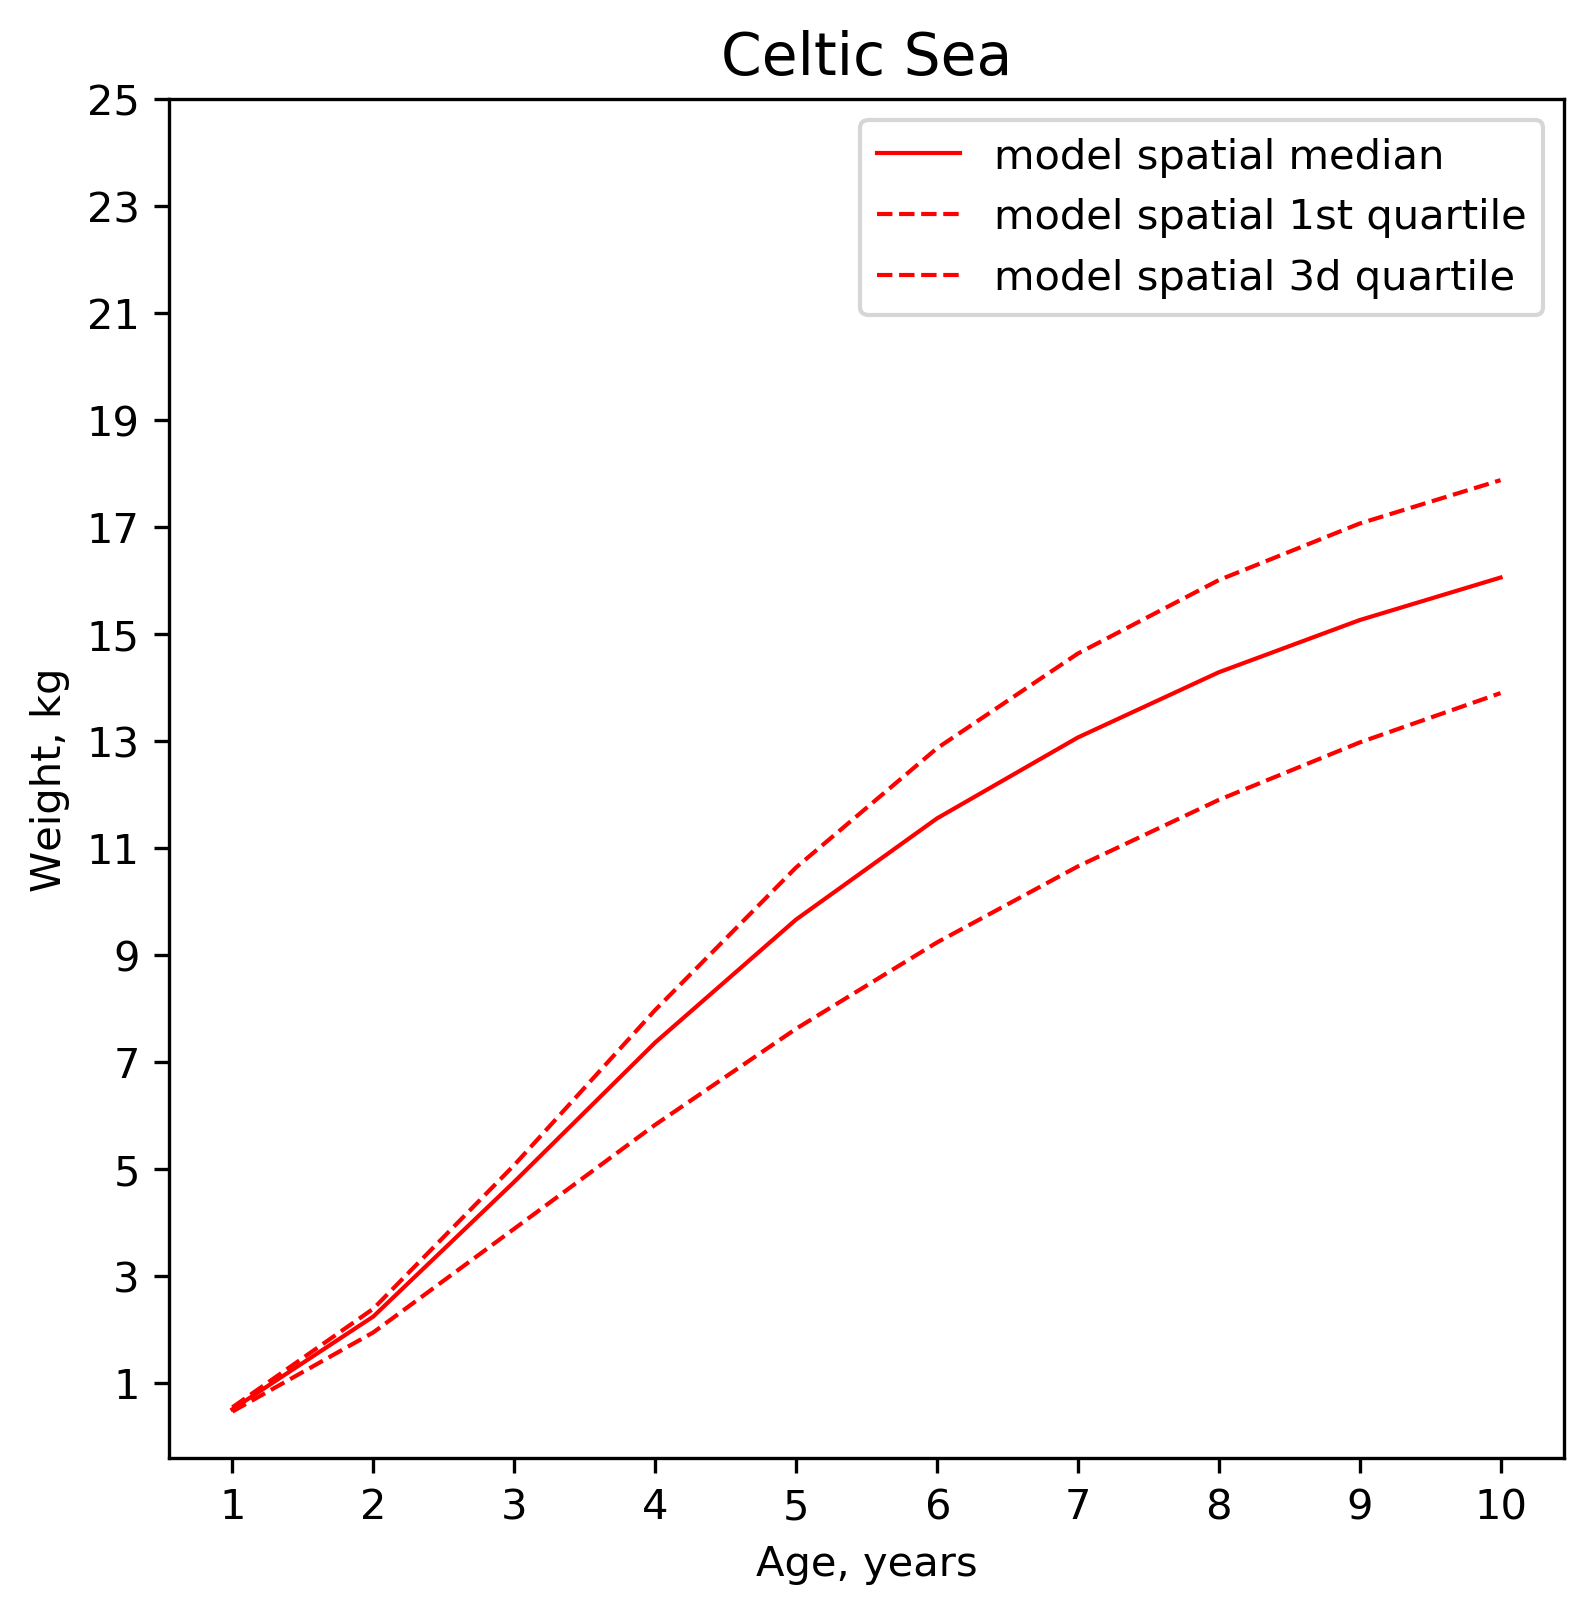

In [30]:
# Plot growth curves 
# Create a figer of particular size and set the number of axes
f, ax = plt.subplots(1, 1, dpi=300, figsize=(6, 6), facecolor='white')

# Plot observations as a boxplot
#obs_df1.loc['1971':'2007'].boxplot(showfliers=False) 

# Plot modeling data as lines
try:
    pd.DataFrame(transposed_md_df1['model spatial median']).plot(ax=ax, color='red', lw=1)
except ValueError:  #raised if `y` is empty.
    pass

try:
    pd.DataFrame(transposed_md_df2['model spatial 1st quartile']).plot(ax=ax, color='red', ls='--', lw=1)
except ValueError:  #raised if `y` is empty.
    pass

try:
    pd.DataFrame(transposed_md_df3['model spatial 3d quartile']).plot(ax=ax, color='red', ls='--', lw=1)
except ValueError:  #raised if `y` is empty.
    pass

ax.set_yticks(range(1, 26, 2))
ax.set_title('Celtic Sea', fontsize=14)

plt.ylabel('Weight, kg', fontsize=10)
plt.xlabel('Age, years', fontsize=10)

ax.set_yticks(range(1, 26, 2))
ax.get_xaxis().set_ticks(range(1,11))
ax.get_xaxis().set_ticklabels(range(1,11))

#line1 = Line2D([0], [0], color='black', linewidth=1, linestyle='-')
#line2 = Line2D([0], [0], color='red', linewidth=1, linestyle='-')
#line3 = Line2D([0], [0], color='green', linewidth=1, linestyle='-')

#lines = [line1, line2]
#labels = ['SODA', 'FESOM hist']

#plt.legend(lines, labels, 
#         bbox_to_anchor=(0.01, 0.01, 1., 0.8), 
#         loc='lower right', 
#         ncol=3,
#         fontsize=12) 



# hide grid cells
ax.grid(False)